# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data = pd.read_csv("/content/heart_.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of target class')

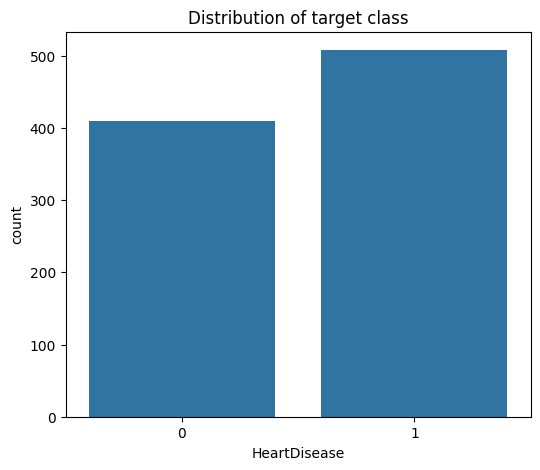

In [7]:
plt.figure(figsize=(6, 5))
sns.countplot(x='HeartDisease', data=data)
plt.title("Distribution of target class")

Text(0.5, 1.0, 'Correlation of numerical attributes with HeartDisease')

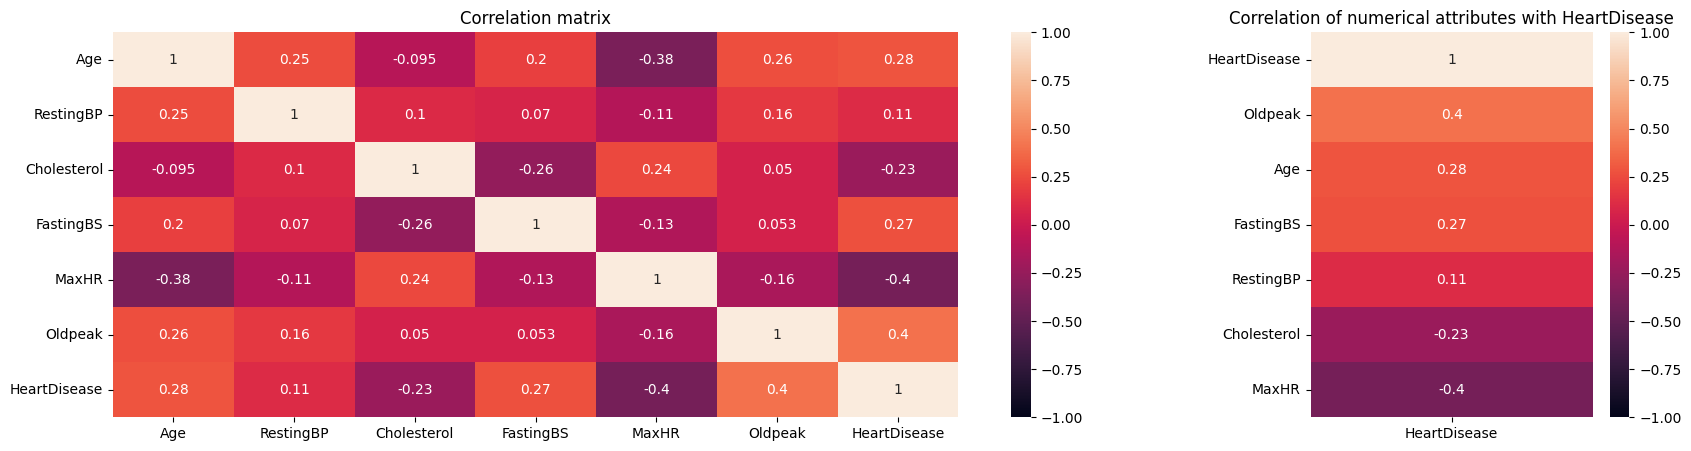

In [8]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["HeartDisease"]].sort_values('HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with HeartDisease")

In [9]:
# labels=['1','0']
# count= data['HeartDisease'].value_counts()
# plt.figure(figsize=(6,6))
# plt.pie(count,labels=labels,autopct='%.0f',explode=(0,.1), colors=['r','g'])
# plt.legend( ['heart disease','Normal'],loc =1)

# plt.title('Heart Disease')
# plt.show()

In [10]:
# px.histogram(data,x='Age',color='HeartDisease').update_layout(title='Age Distribution')

# Data PreProcessing

In [11]:
X=data.drop('HeartDisease', axis=1)

y=data['HeartDisease']

In [12]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [13]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [14]:
data.select_dtypes(include="object").columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Data Transformation

In [15]:
le_model = LabelEncoder()

X['Sex'] = le_model.fit_transform(X['Sex'])
X['ChestPainType'] = le_model.fit_transform(X['ChestPainType'])
X['RestingECG'] = le_model.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le_model.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le_model.fit_transform(X['ST_Slope'])

In [16]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [17]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [18]:
X

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.40909091,
        0.5       ],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.43181818,
        0.5       ],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        0.5       ],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        1.        ]])

# Splitting Data 90% Train 10% Test

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [20]:
# sc_X = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.transform(x_test)

# Handling Imbalanced Data

In [21]:
y_train.value_counts()

HeartDisease
1    457
0    369
Name: count, dtype: int64

In [22]:
smote = SMOTE(random_state=42)

x_train, y_train = smote.fit_resample(x_train,y_train)
x_test, y_test = smote.fit_resample(x_test,y_test)

In [23]:
y_train.value_counts()

HeartDisease
1    457
0    457
Name: count, dtype: int64

In [24]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel


lasso = LassoCV(alphas=np.logspace(-8, 8, 200), cv=5, n_jobs=-1)
lasso.fit(x_train, y_train)

# Select features based on the Lasso regularization
model_lasso = SelectFromModel(lasso, prefit=True)
x_train_selected = model_lasso.transform(x_train)
x_test_selected = model_lasso.transform(x_test)

# Model

## RF

In [25]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train_selected,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [26]:
rf_pred = rf_clf.predict(x_test_selected) # Make predictions on the test data

In [27]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.9117647058823529
Random Forest Precision: 0.9038461538461539
Random Forest Recall: 0.9215686274509803
Random Forest F1 Score: 0.9126213592233009
Random Forest Confusion Matrix: [[46  5]
 [ 4 47]]


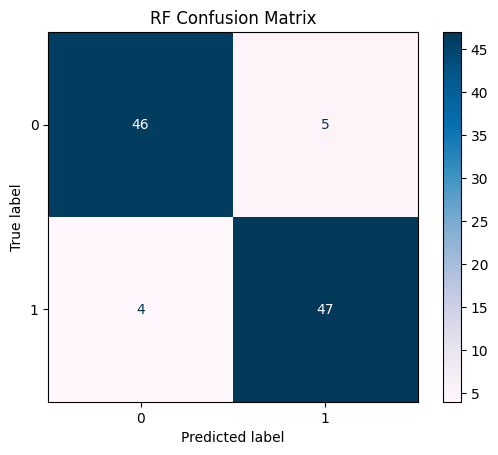

In [28]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

## DT

In [29]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train_selected,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [30]:
dc_pred = dc_clf.predict(x_test_selected) # Make predictions on the test data

In [31]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.8627450980392157
Decision Tree Precision: 0.9111111111111111
Decision Tree Recall: 0.803921568627451
Decision Tree F1 Score: 0.8541666666666666
Decision Tree Confusion Matrix: [[47  4]
 [10 41]]


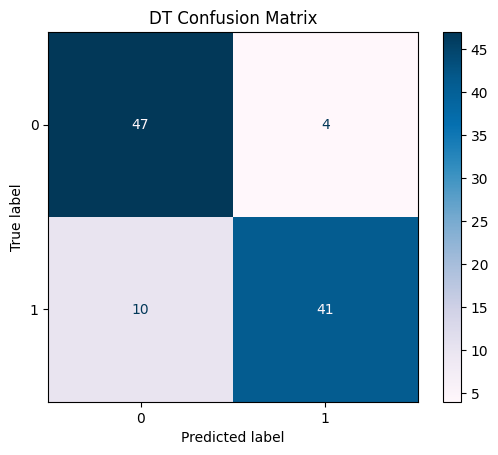

In [32]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

## NB

In [33]:
nb_clf = GaussianNB()
nb_clf.fit(x_train_selected,y_train)

GaussianNB()

In [34]:
nb_pred = nb_clf.predict(x_test_selected)

In [35]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:",precision_score(y_test,nb_pred))
print("Naive Bayes Recall:",recall_score(y_test,nb_pred))
print("Naive Bayes F1 Score:",f1_score(y_test,nb_pred))
print("Naive Bayes Confusion Matrix:",confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.9117647058823529
Naive Bayes Precision: 0.9038461538461539
Naive Bayes Recall: 0.9215686274509803
Naive Bayes F1 Score: 0.9126213592233009
Naive Bayes Confusion Matrix: [[46  5]
 [ 4 47]]


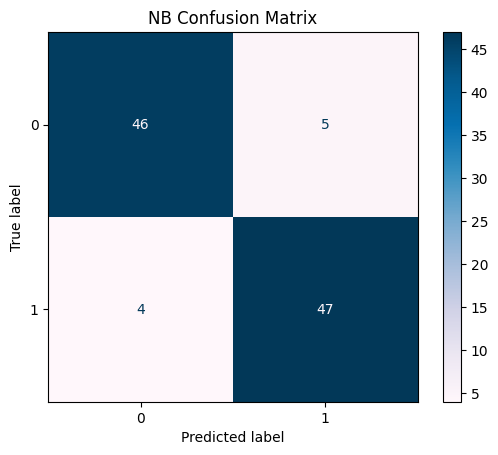

In [36]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(y_test,nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

## LR

In [37]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [38]:
anss=model.predict(x_test_selected)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precision is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1_test_lr)
print("LR Confusion Matrix:",confusion_matrix(anss,y_test))

Testing Accuracy is  0.8823529411764706
Testing Precision is  0.8823529411764706
Testing recall is  0.8823529411764706
Testing F1 is  0.8823529411764706
LR Confusion Matrix: [[45  6]
 [ 6 45]]


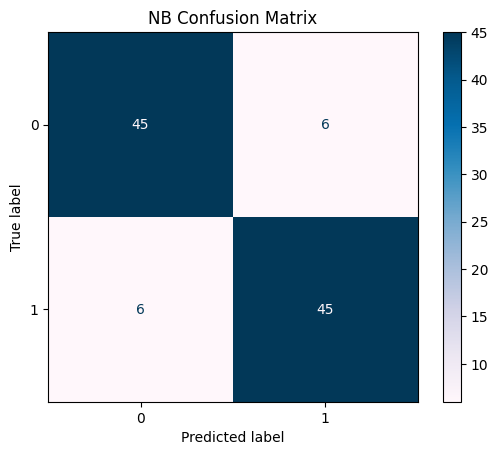

In [39]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

## XGBoost

In [40]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
acc2 = model2.predict(x_test_selected)

In [42]:
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc2,y_test))

Testing Accuracy is  0.8823529411764706
Testing Precision is  0.8627450980392157
Testing recall is  0.8979591836734694
Testing F1 is  0.8799999999999999
xgb Confusion Matrix: [[46  7]
 [ 5 44]]


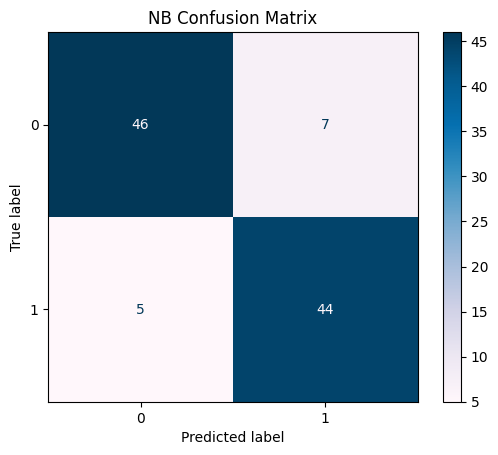

In [43]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc2,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

## MLP

In [44]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train_selected, y_train)

MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [45]:
y_pred_t = model3.predict(x_test_selected)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
mlp_cm = confusion_matrix(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)

Testing Accuracy is  0.9019607843137255
Testing Precision is  0.8823529411764706
Testing recall is  0.9183673469387755
Testing F1 is  0.9
MLP Confusion Matrix [[47  6]
 [ 4 45]]


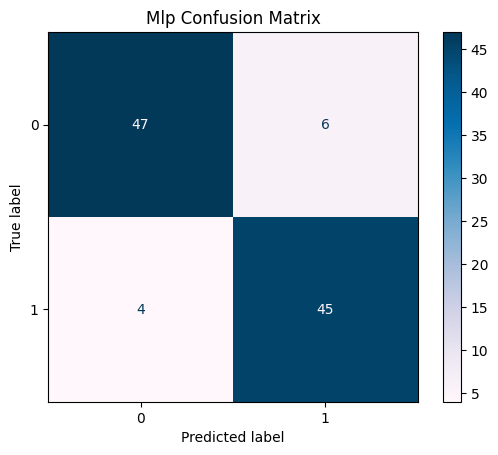

In [46]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Mlp Confusion Matrix')
plt.show()

## SVM

In [47]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2, probability=True)
classifier.fit(x_train_selected,y_train)

Y_predict = classifier.predict(x_test_selected)

In [48]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))
print("SVM Confusion Matrix:",confusion_matrix(y_test,Y_predict))

SVM Accuracy: 0.9019607843137255
SVM Precision: 0.8867924528301887
SVM Forest Recall: 0.9215686274509803
SVM Forest F1 Score: 0.9038461538461539
SVM Confusion Matrix: [[45  6]
 [ 4 47]]


In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,Y_predict)
svm_cm

array([[45,  6],
       [ 4, 47]])

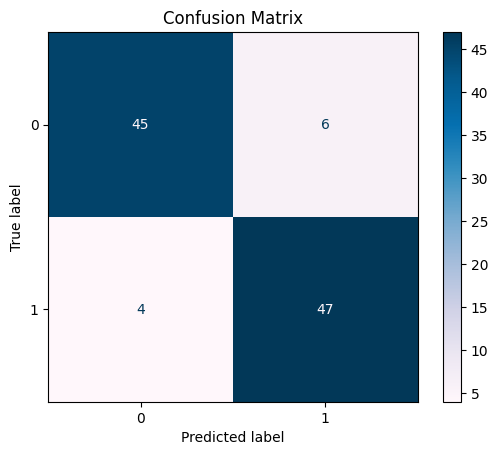

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

## KNN

In [51]:
#When K = 5

#KNN MODEL building

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train_selected,y_train)


#prediction

Y_predk = knn_classifier.predict(x_test_selected)

print("KNN Accuracy:",accuracy_score(y_test,Y_predk))
print("KNN Precision:",precision_score(y_test,Y_predk))
print("KNN Recall:",recall_score(y_test,Y_predk))
print("KNN F1 Score:",f1_score(y_test,Y_predk))
print("KNN Confusion matrix:",confusion_matrix(y_test,Y_predk))

KNN Accuracy: 0.8725490196078431
KNN Precision: 0.9130434782608695
KNN Recall: 0.8235294117647058
KNN F1 Score: 0.865979381443299
KNN Confusion matrix: [[47  4]
 [ 9 42]]


In [52]:
knn_cm = confusion_matrix(y_test,Y_predk)
knn_cm

array([[47,  4],
       [ 9, 42]])

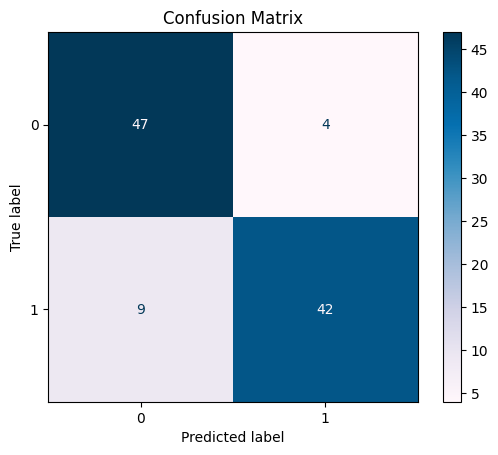

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

## GB

In [54]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [55]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test_selected)

In [56]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.8725490196078431
GB Precision: 0.9130434782608695
GB Forest Recall: 0.8235294117647058
GB Forest F1 Score: 0.865979381443299


In [57]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[47,  4],
       [ 9, 42]])

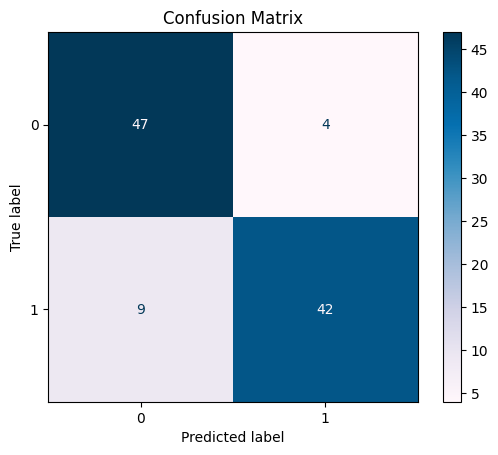

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [59]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_predk),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)
                                                                                 ]})


In [60]:
final_data

,Models,ACC
0,LR,0.882353
1,RF,0.911765
2,NB,0.911765
3,DT,0.862745
4,SVM,0.901961
5,KNN,0.872549
6,GB,0.872549
7,MLP,0.901961
8,XGB,0.882353


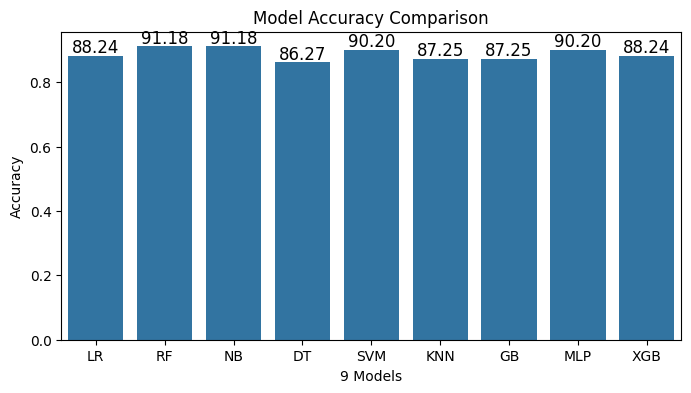

In [61]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

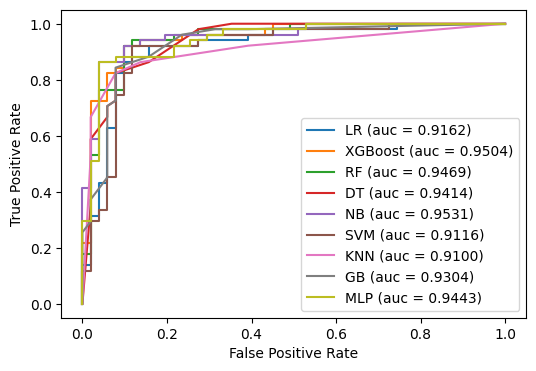

LR AUC: 0.9162
XGB AUC: 0.9504
RF AUC: 0.9469
DT AUC: 0.9414
NB AUC: 0.9531
SVM AUC: 0.9116
KNN AUC: 0.9100
GB AUC: 0.9304
MLP AUC: 0.9443


In [63]:
#ROC
# LR
y_prob_lr = model.predict_proba(x_test_selected)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
y_prob_xgb = model2.predict_proba(x_test_selected)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# RF
y_prob_rf = rf_clf.predict_proba(x_test_selected)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(rf_fpr, rf_tpr)

# DT
y_prob_dt = dc_clf.predict_proba(x_test_selected)[:, 1]
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)


# NB
y_prob_nb = nb_clf.predict_proba(x_test_selected)[:, 1]
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(nb_fpr, nb_tpr)

# SVM
y_prob_svm = classifier.predict_proba(x_test_selected)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(svm_fpr, svm_tpr)

# KNN
y_prob_knn = knn_classifier.predict_proba(x_test_selected)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(knn_fpr, knn_tpr)

# GB
y_prob_gb = gb_classifier.predict_proba(x_test_selected)[:, 1]
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(gb_fpr, gb_tpr)

# MLP
y_prob_mlp = model3.predict_proba(x_test_selected)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# RF
# y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
# rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
# roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('LR AUC: {:.4f}'.format(roc_auc_lr))
print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
print('RF AUC: {:.4f}'.format(roc_auc_rf))
print('DT AUC: {:.4f}'.format(roc_auc_dt))
print('NB AUC: {:.4f}'.format(roc_auc_nb))
print('SVM AUC: {:.4f}'.format(roc_auc_svm))
print('KNN AUC: {:.4f}'.format(roc_auc_knn))
print('GB AUC: {:.4f}'.format(roc_auc_gb))
print('MLP AUC: {:.4f}'.format(roc_auc_mlp))